#### Inspired by https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/

In [1]:
import cv2
import math

In [9]:
!mkdir Data/frames

In [11]:
count = 0
videoFile = "Data/Tom_and_jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Data/frames/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [12]:
import turicreate as tc

In [15]:
data = tc.image_analysis.load_images("Data/frames", with_path=True)

In [17]:
import pandas as pd

In [19]:
label=pd.read_csv('Data/mapping.csv')

In [37]:
label.sort_values(by='Image_ID',inplace=True)

In [38]:
data['label']=label['Class']

In [39]:
data

Columns:
	path	str
	image	Image
	label	int

Rows: 298

Data:
+--------------------------+-------------------------+-------+
|           path           |          image          | label |
+--------------------------+-------------------------+-------+
|  Data/frames/frame0.jpg  | Height: 720 Width: 1280 |   1   |
|  Data/frames/frame1.jpg  | Height: 720 Width: 1280 |   1   |
| Data/frames/frame10.jpg  | Height: 720 Width: 1280 |   2   |
| Data/frames/frame100.jpg | Height: 720 Width: 1280 |   2   |
| Data/frames/frame101.jpg | Height: 720 Width: 1280 |   2   |
| Data/frames/frame102.jpg | Height: 720 Width: 1280 |   0   |
| Data/frames/frame103.jpg | Height: 720 Width: 1280 |   0   |
| Data/frames/frame104.jpg | Height: 720 Width: 1280 |   0   |
| Data/frames/frame105.jpg | Height: 720 Width: 1280 |   0   |
| Data/frames/frame106.jpg | Height: 720 Width: 1280 |   0   |
+--------------------------+-------------------------+-------+
[298 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [40]:
data.save('tom_jerry.sframe')


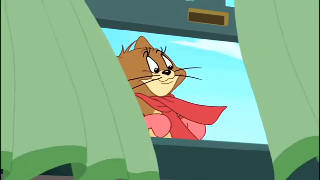
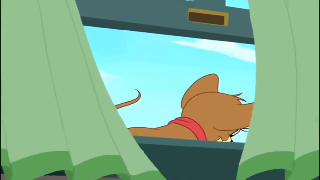
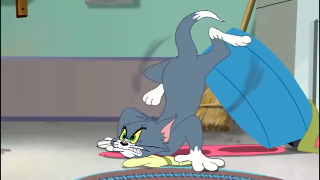
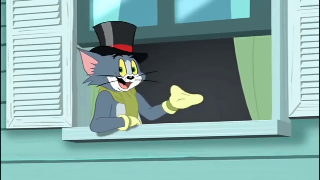
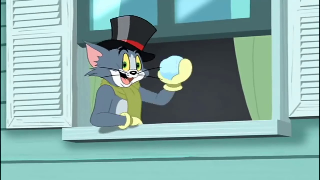
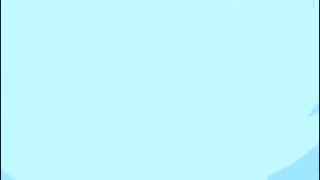
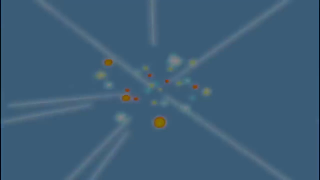
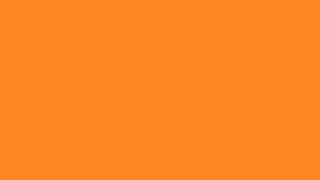
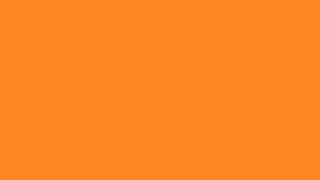
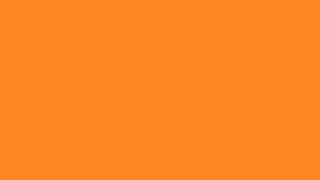
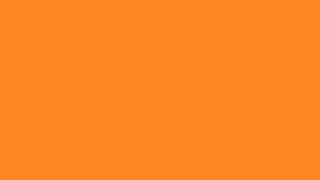
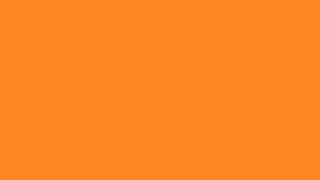
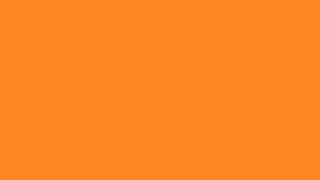
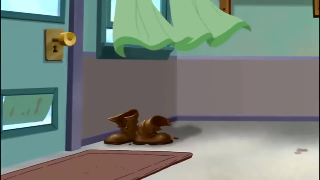
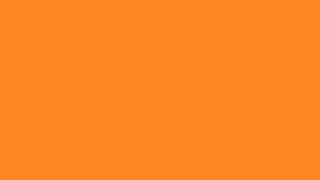
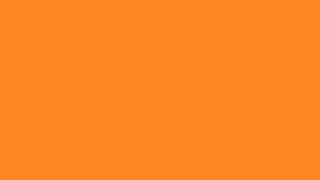
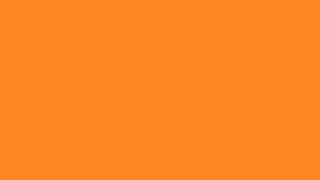
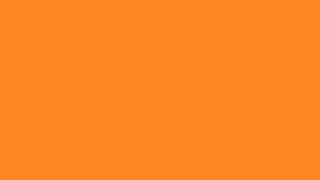
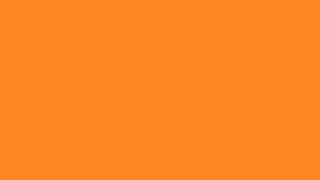
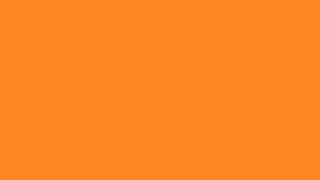
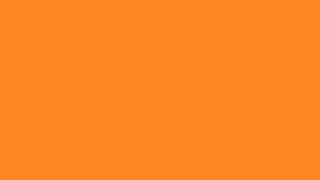
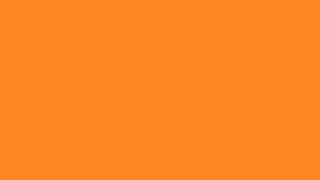
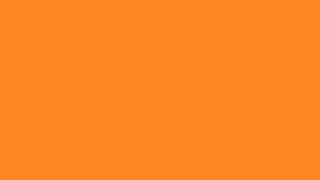
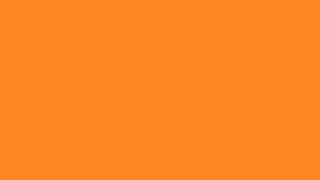
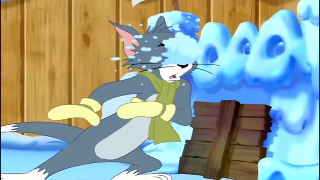
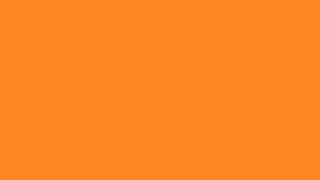
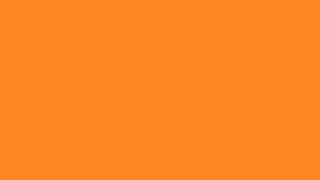
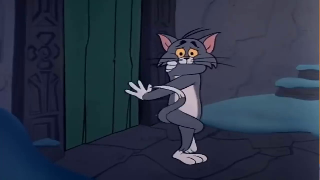
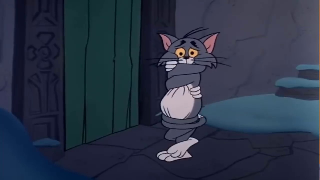
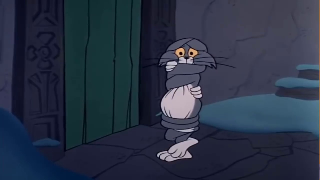
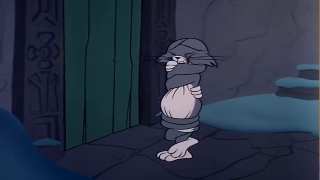
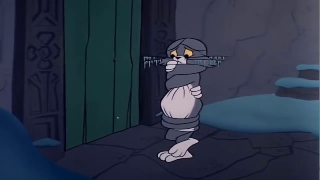
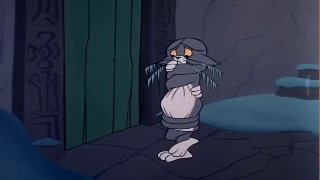
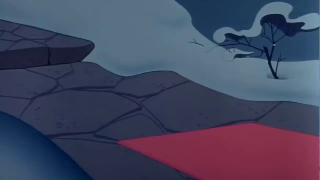
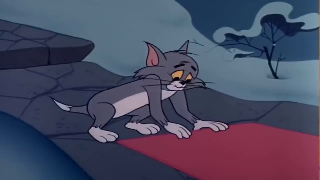
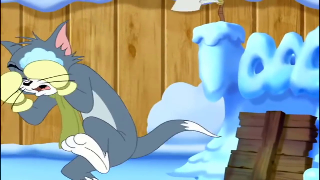
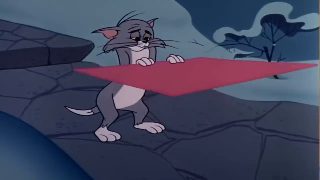
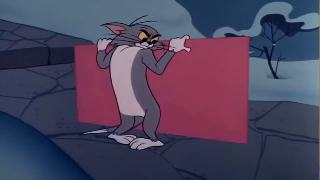
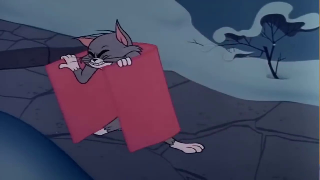
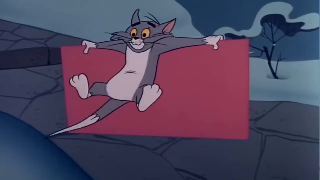
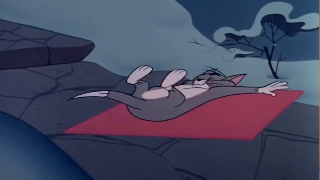
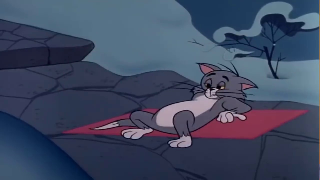
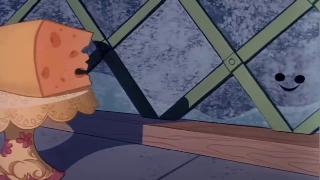
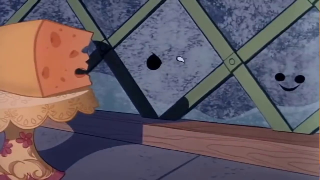
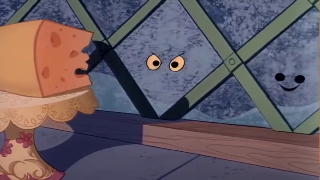
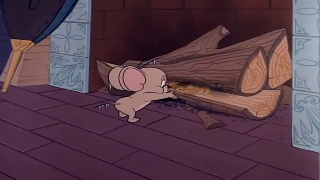
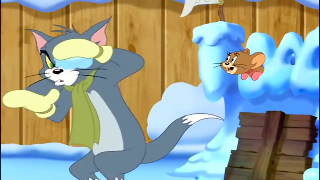
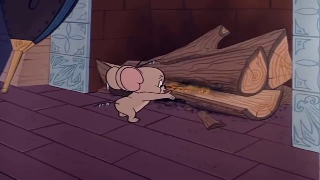
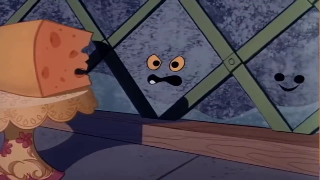
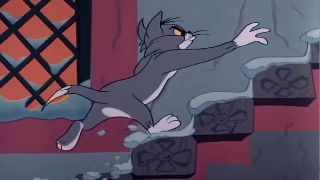
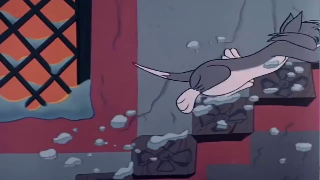
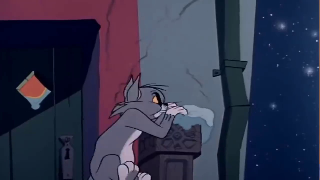
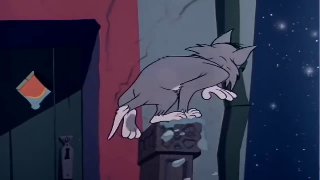
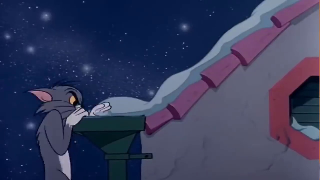
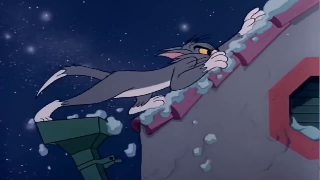
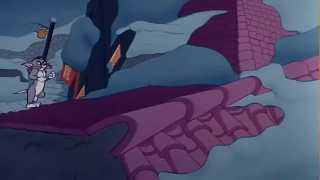
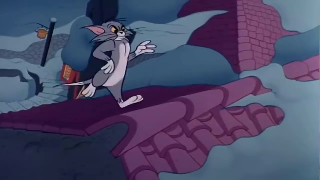
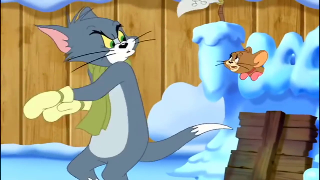
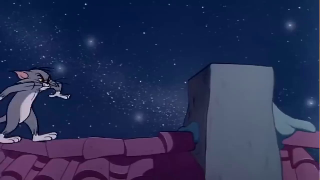
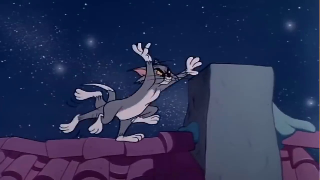
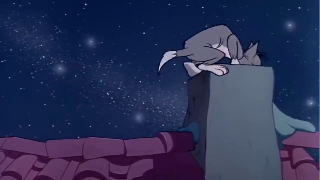
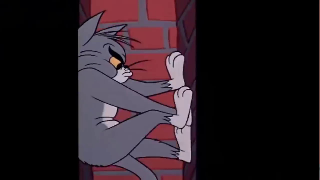
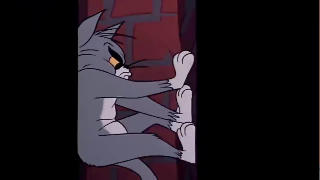
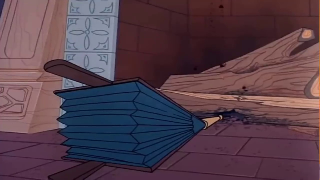
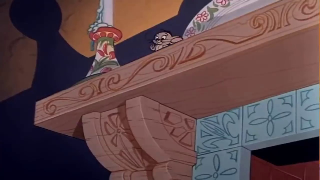
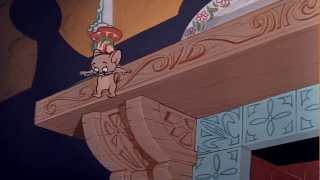
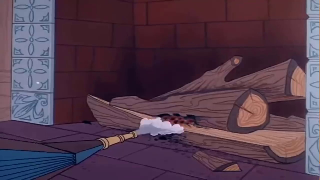
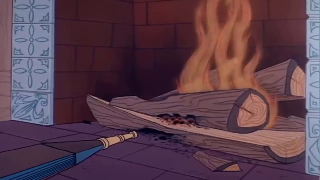
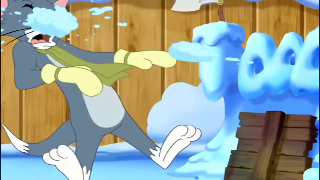
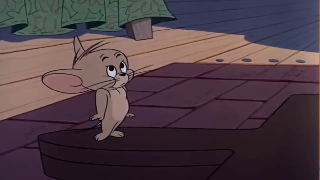
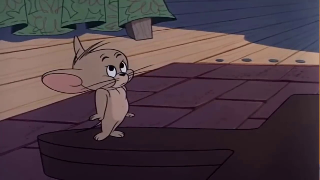
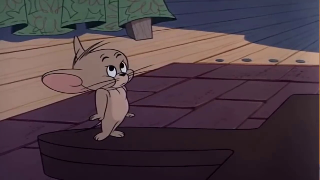
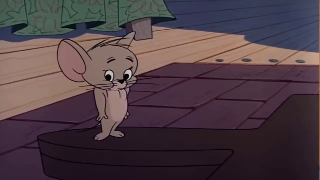
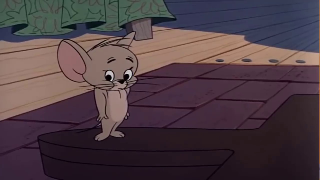
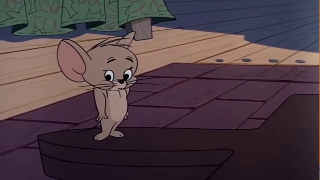
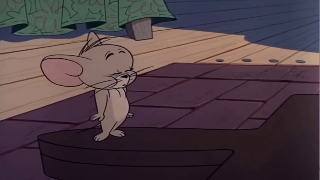
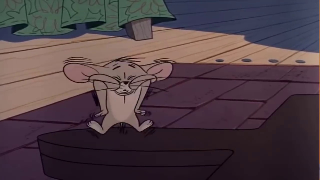
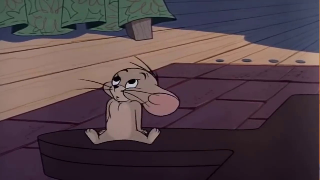
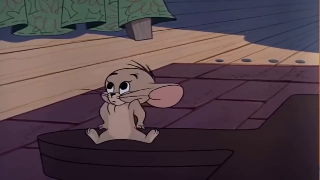
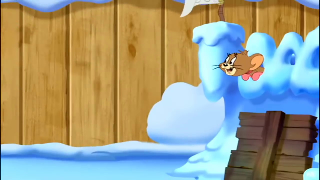
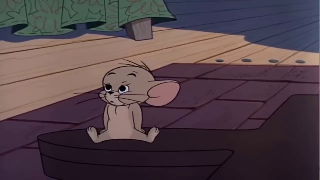
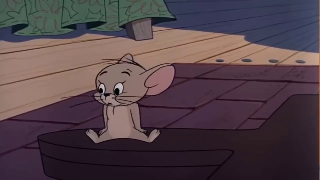
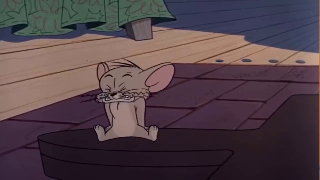
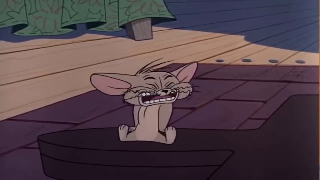
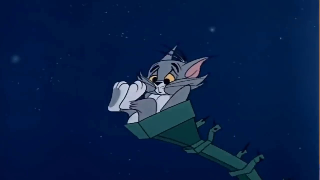
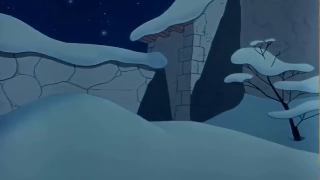
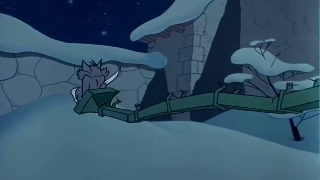
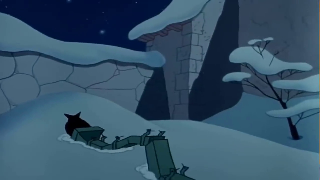
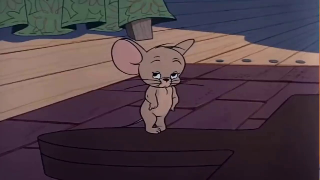
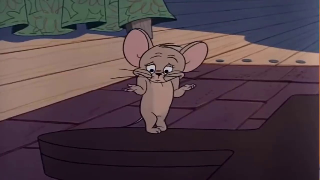
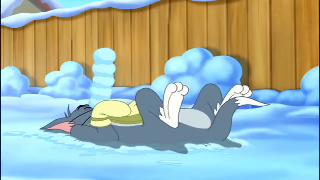
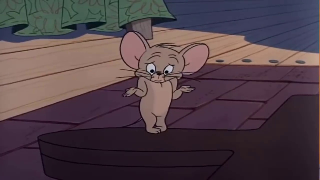
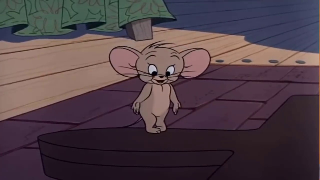
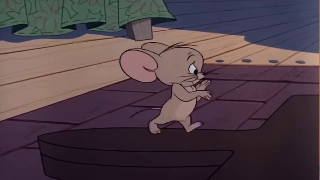
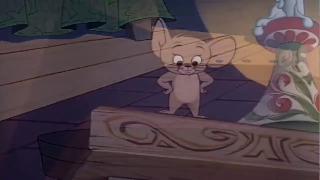
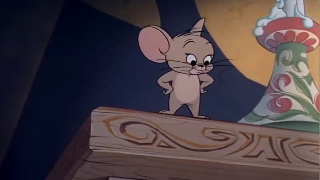
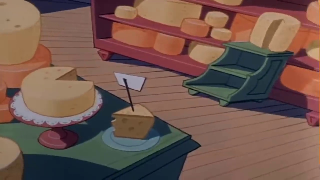
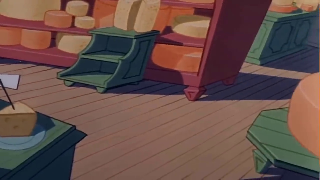
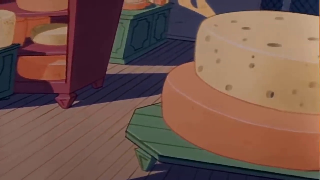
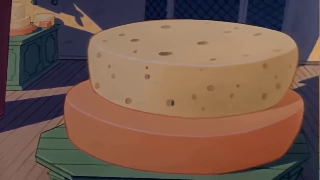

In [41]:
data.explore()

In [43]:
train_data, test_data = data.random_split(0.8,exact=True, seed=10)

In [78]:
model_resnet = tc.image_classifier.create(train_data, target='label',validation_set=test_data)

Performing feature extraction on resized images...
Completed  64/238
Completed 128/238
Completed 192/238
Completed 238/238
Performing feature extraction on resized images...
Completed 60/60


Logistic regression:

--------------------------------------------------------

Number of examples          : 238

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 4098

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.005035  | 0.116255     | 0.428571          | 0.300000            |

| 1         | 13       | 6.872304  | 0.246775     | 0.512605          | 0.450000            |

| 2         | 14       | 6.872304  | 0.285882     | 0.592437          | 0.550000            |

| 3         | 19       | 2.071478  | 0.388473     | 0.655462          | 0.616667            |

| 4         | 21       | 1.436475  | 0.445649     | 0.752101          | 0.616667            |

| 9         | 26       | 1.436475  | 0.641529     | 0.970588          | 0.683333            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [79]:
model_squeeznet = tc.image_classifier.create(train_data, target='label',model='squeezenet_v1.1',validation_set=test_data)

Performing feature extraction on resized images...
Completed  64/238
Completed 128/238
Completed 192/238
Completed 238/238
Performing feature extraction on resized images...
Completed 60/60


Logistic regression:

--------------------------------------------------------

Number of examples          : 238

Number of classes           : 3

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 2002

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.004454  | 0.094860     | 0.428571          | 0.300000            |

Warning: Reached max step size.

| 1         | 15       | 25.000000 | 0.203206     | 0.533613          | 0.433333            |

| 2         | 16       | 25.000000 | 0.240298     | 0.638655          | 0.633333            |

| 3         | 21       | 2.585798  | 0.310441     | 0.815126          | 0.700000            |

| 4         | 26       | 1.555289  | 0.373500     | 0.865546          | 0.816667            |

| 9         | 33       | 1.555289  | 0.519917     | 0.924370          | 0.850000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [81]:
model_squeeznet.save('video_squeezenet.model')

In [83]:
!mkdir Data/frames_test

In [91]:
count = 0
videoFile = "Data/Tom_and_Jerry_3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Data/frames_test/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [93]:
label=pd.read_csv('Data/testing.csv')

In [94]:
label.sort_values(by='Image_ID',inplace=True)

In [95]:
label

Image_ID  Class
0      test0.jpg      2
1      test1.jpg      2
10    test10.jpg      2
100  test100.jpg      1
101  test101.jpg      1
..           ...    ...
95    test95.jpg      1
96    test96.jpg      2
97    test97.jpg      2
98    test98.jpg      2
99    test99.jpg      2

[186 rows x 2 columns]

In [97]:
data_test = tc.image_analysis.load_images("Data/frames_test", with_path=True)
data_test["label"] = label["Class"]

In [98]:
data_test

Columns:
	path	str
	image	Image
	label	int

Rows: 186

Data:
+------------------------------+-------------------------+-------+
|             path             |          image          | label |
+------------------------------+-------------------------+-------+
|  Data/frames_test/test0.jpg  | Height: 720 Width: 1280 |   2   |
|  Data/frames_test/test1.jpg  | Height: 720 Width: 1280 |   2   |
| Data/frames_test/test10.jpg  | Height: 720 Width: 1280 |   2   |
| Data/frames_test/test100.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test101.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test102.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test103.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test104.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test105.jpg | Height: 720 Width: 1280 |   1   |
| Data/frames_test/test106.jpg | Height: 720 Width: 1280 |   2   |
+------------------------------+-------------------------+-------+
[186 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [114]:
model_squeeznet.evaluate(data_test)

Performing feature extraction on resized images...
Completed  64/186
Completed 128/186
Completed 186/186


/home/shivalika/Desktop/ds_turicreate/venv/lib/python3.6/site-packages/turicreate/aggregate.py:92: UserWarning: Passing parameter(s) to COUNT is deprecated. This functionality will be removed in the next major release. Any passed parameters are ignored.
  + 'the next major release. Any passed parameters are ignored.')


{'accuracy': 0.6559139784946236,
 'f1_score': 0.5689921933369808,
 'log_loss': 1.0315274818970883,
 'precision': 0.6566285278413425,
 'recall': 0.6742240215924427,
 'auc': 0.880776057076894,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 
 Data:
 +-----------+---------+-----+----+-----+-------+
 | threshold |   fpr   | tpr | p  |  n  | class |
 +-----------+---------+-----+----+-----+-------+
 |    0.0    |   1.0   | 1.0 | 26 | 160 |   0   |
 |   1e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   2e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   3e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   4e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   5e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   6e-05   | 0.99375 | 1.0 | 26 | 160 |   0   |
 |   7e-05   |  0.9875 | 1.0 | 26 | 160 |   0   |
 |   8e-05   | 0.98125 | 1.0 | 26 | 160 |   0   |
 |   9e-05   | 0.98125 | 1.0 | 26 | 160 |   0   |
 +-----------+---------+-----+----+-----+

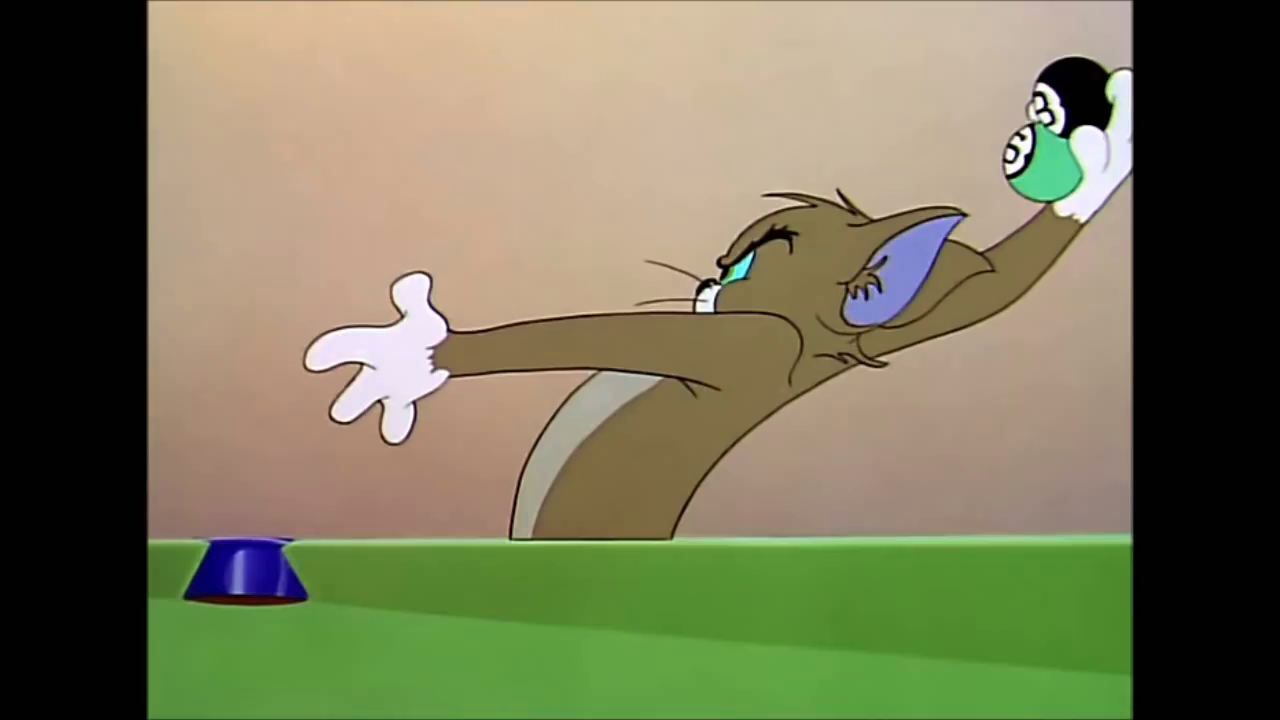

Class is  2


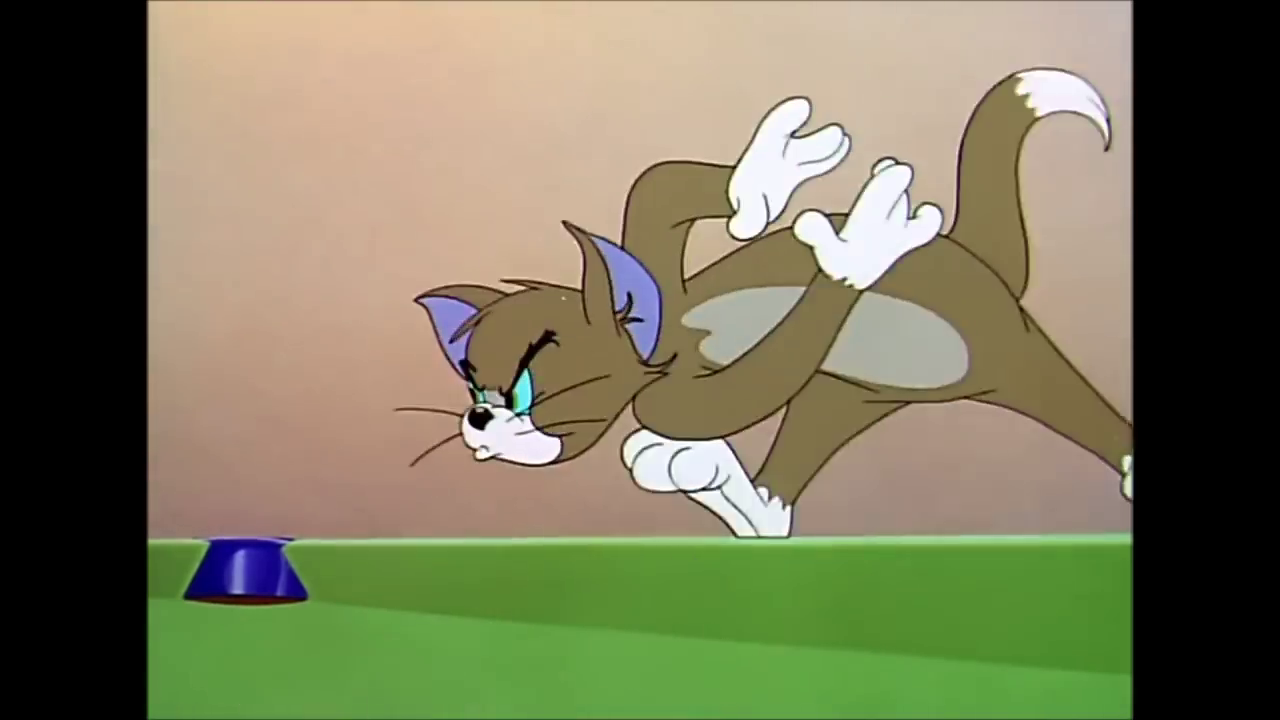

Class is  1


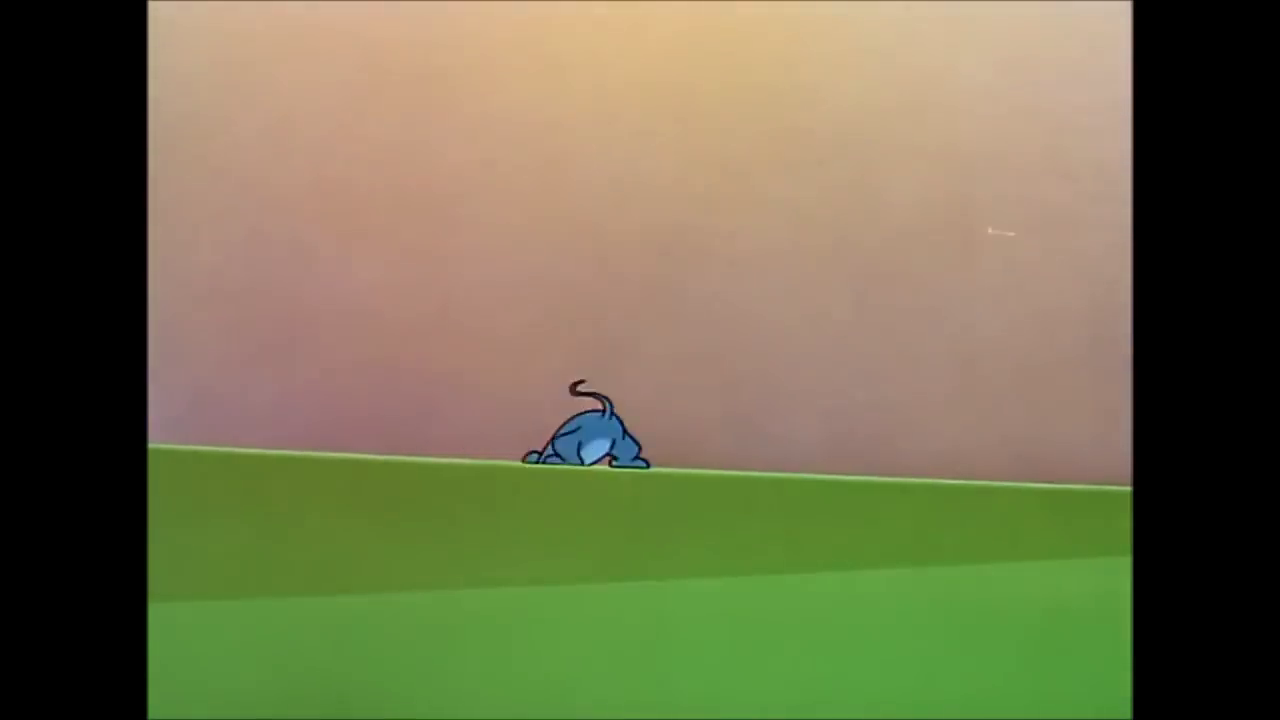

Class is  0


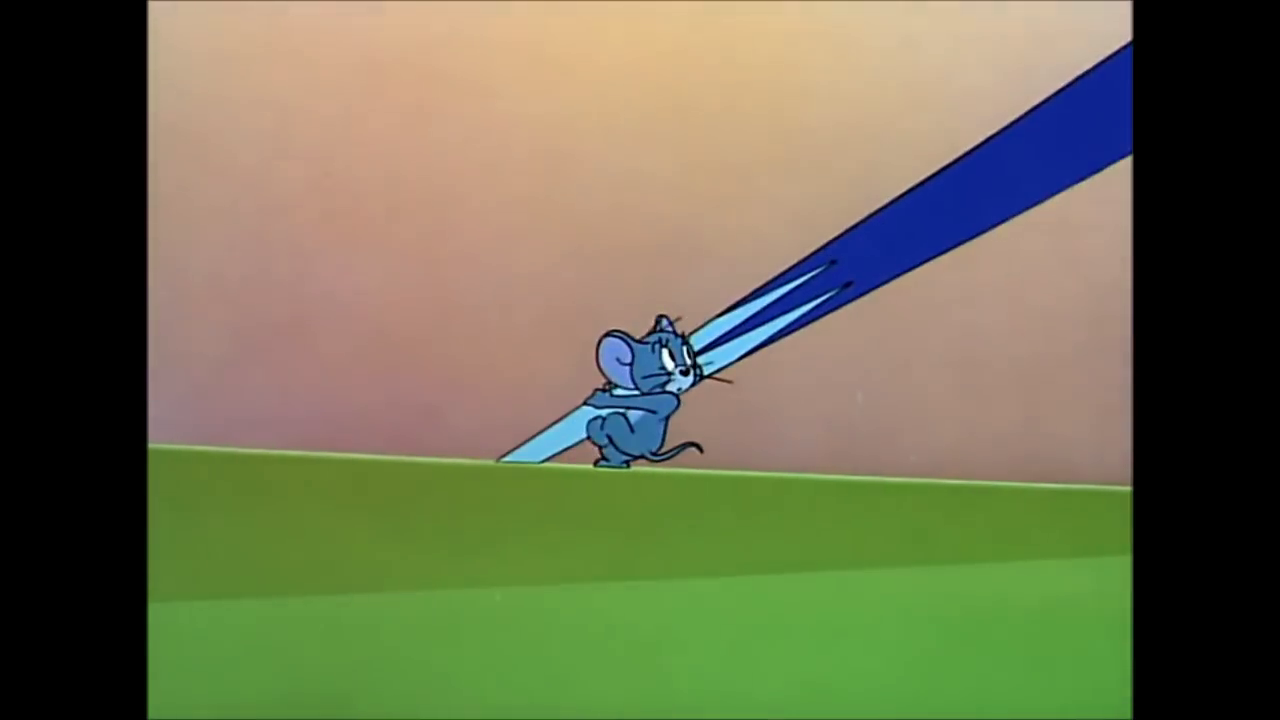

Class is  0


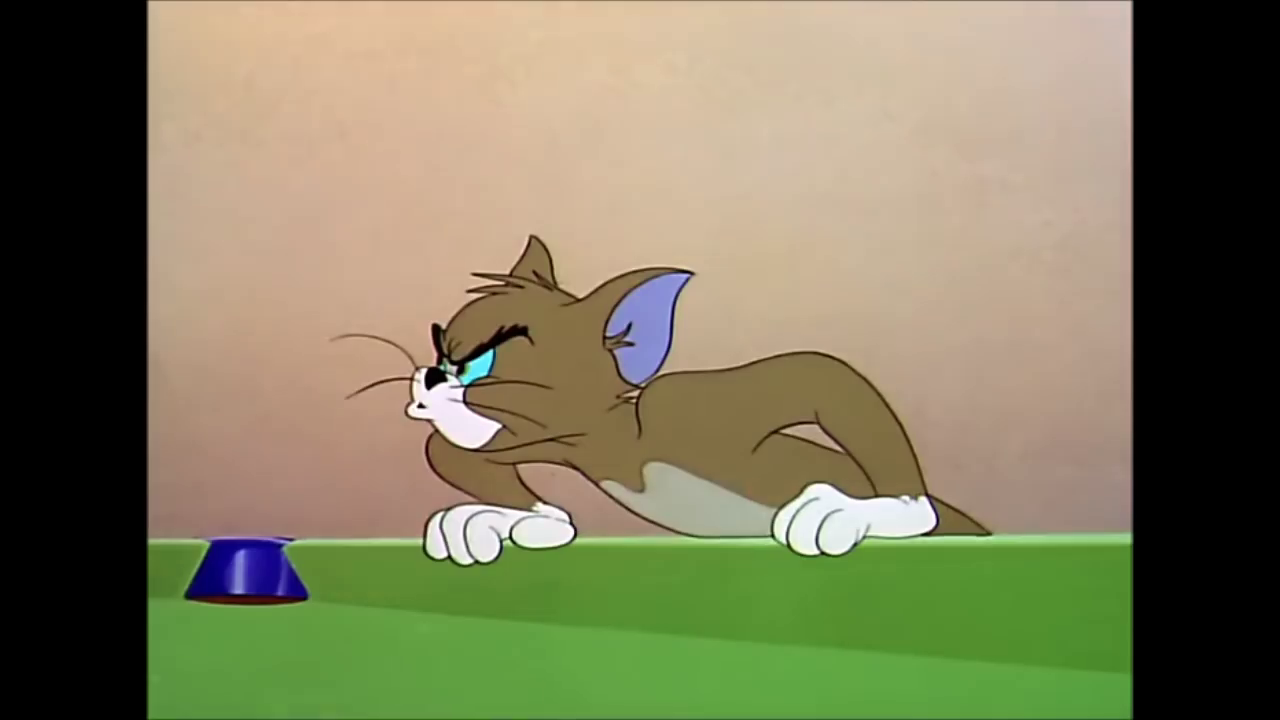

Class is  1


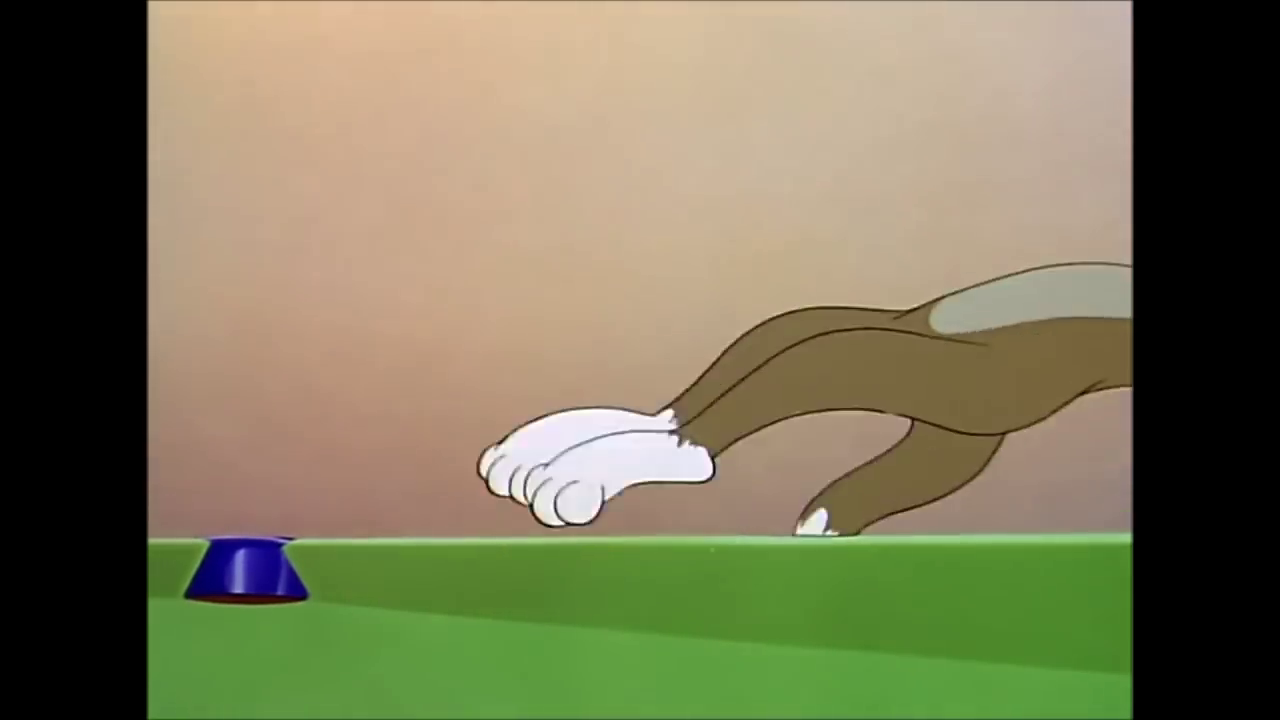

Class is  2


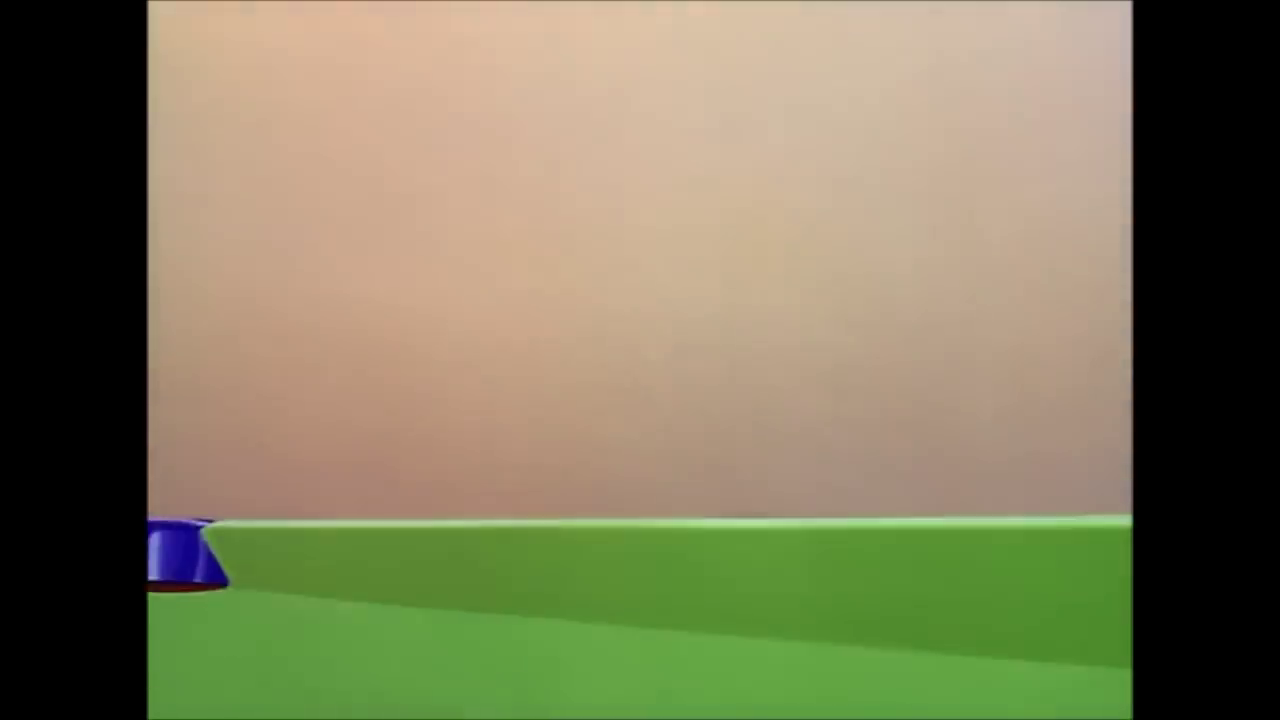

Class is  0


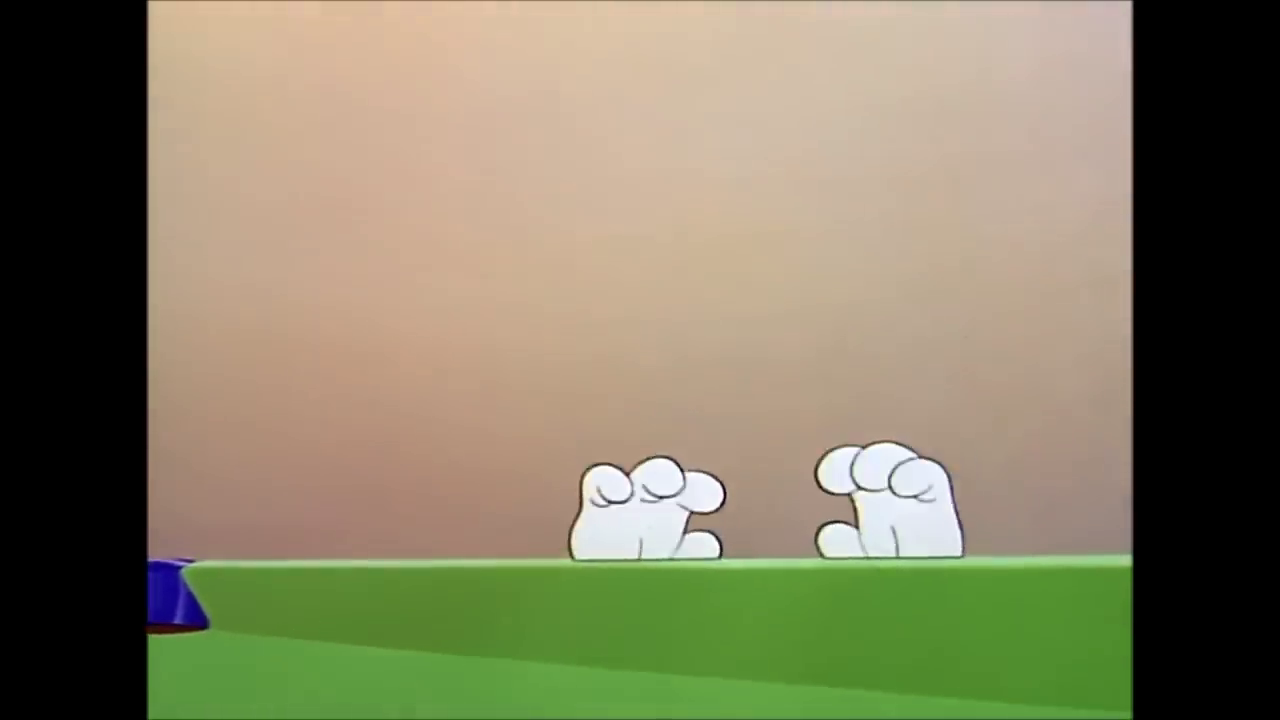

Class is  0


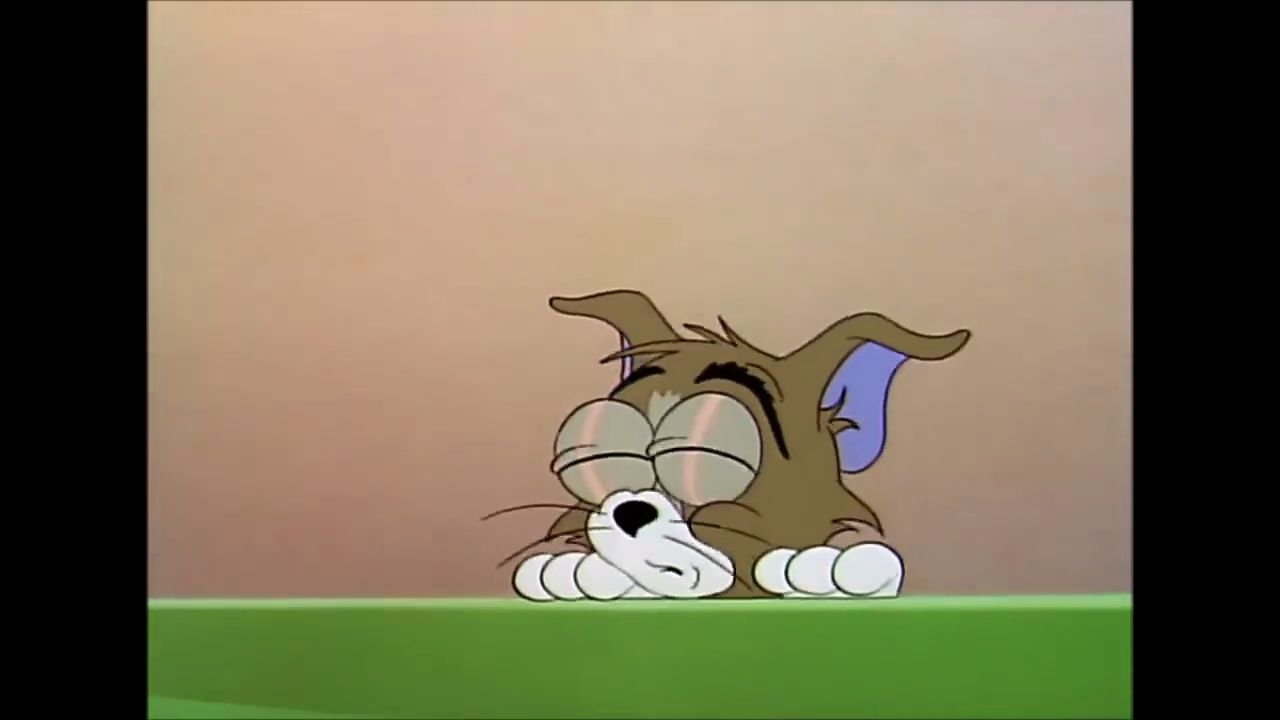

Class is  1


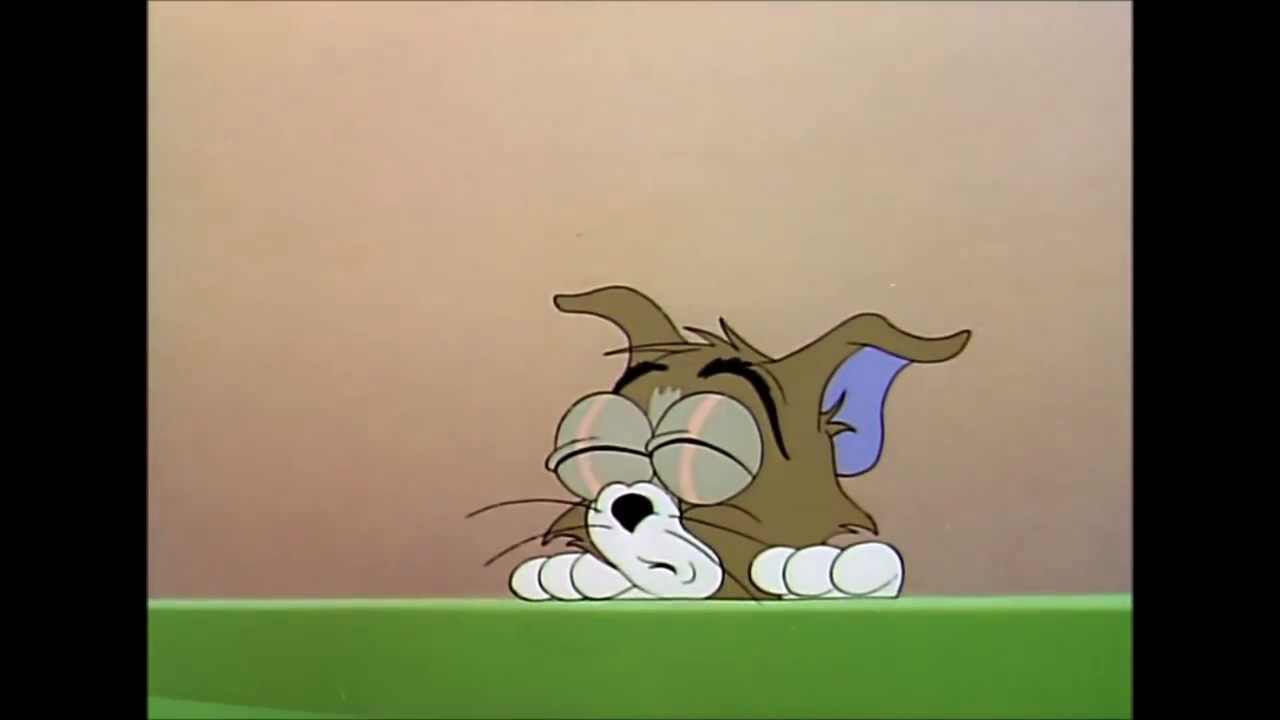

Class is  1


In [138]:
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=0
while(cap.isOpened()):

    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        RAW_FORMAT=2
        numpy_array = frame
        png = tc.Image(_image_data=numpy_array.tobytes(), 
             _width=numpy_array.shape[1], 
             _height=numpy_array.shape[0], 
             _channels=numpy_array.shape[2], 
             _format_enum=RAW_FORMAT, 
             _image_data_size=numpy_array.size)
        png.show()
        print ("Class is ",model_squeeznet.predict(png))
        x += 1 
        if x == 10 :
            break
cap.release()